In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### 3 - Exercicio 

In [17]:
df = pd.read_excel("dados_questao_2_5.xlsx", index_col=0)

In [18]:
df

,61.32,55.29,52.83,57.94,53.31,51.32,52.18,52.37,57.91,53.93,47.88,47.41,47.17,51.05
X,,,,,,,,,,,,,,
Y,39.37,39.8,40.03,41.32,42.03,42.37,43.93,44.9,44.9,45.12,45.6,46.03,47.83,48.55


In [19]:
x = dict()
y = dict()


In [20]:
array_y = []
array_x = []

for i in df.T.Y:
    array_y.append(float(i))

for i in df:
    array_x.append(float(i))

x["array"] = array_x
y["array"] = array_y

## Calculando a media
x["mean"] = sum(x["array"]) / len(x["array"])
y["mean"] = sum(y["array"]) / len(y["array"])


new_df = pd.DataFrame({
    "X": array_x,
    "Y": array_y
})


In [21]:
new_df.mean()

X    52.993571
Y    43.698571
dtype: float64

In [22]:
new_df.median()

X    52.600
Y    44.415
dtype: float64

In [23]:
new_df.std()

X    4.142771
Y    2.938047
dtype: float64

In [24]:
### Calculando o MAD 


MAD_X = np.median(np.abs(new_df.X - np.median(new_df.X)))
MAD_Y = np.median(np.abs(new_df.Y - np.median(new_df.Y)))
print(round(MAD_X, 4))
print(round(MAD_Y, 4))


2.12
2.215


In [25]:
### Calculando MSD 

modulo = (new_df.X - new_df.Y)**2
MSD = modulo.mean()
print(round(MSD, 4))

125.2626


In [26]:
correlacao = new_df.X.corr(new_df.Y)

print(correlacao)

-0.6597511749991717


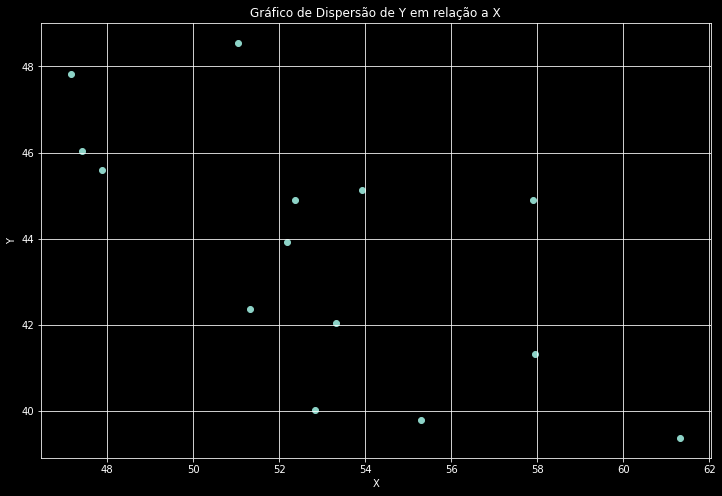

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(new_df.X, new_df.Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfico de Dispersão de Y em relação a X")
plt.grid(True)
plt.show()

-----

In [28]:
df = pd.read_excel("dados_questao_2_8.xlsx", index_col=0)

In [29]:
df.head()

,Valor
Ano,
1947,11
1948,20
1949,29
1950,32
1951,38


In [30]:
df.index

Int64Index([1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
            1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
            1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989],
           dtype='int64', name='Ano')

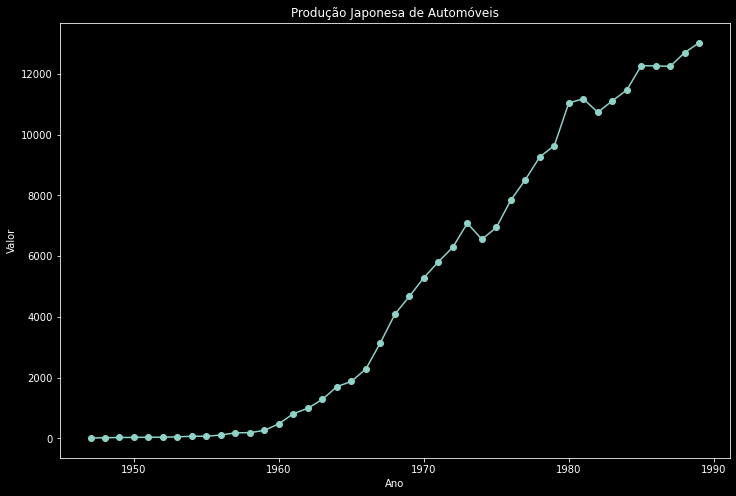

In [31]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df.Valor, marker='o', linestyle='-')
plt.title("Produção Japonesa de Automóveis")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.show()

In [32]:
## Verificando se existe valor igual a zero
df[df.Valor == 0]

,Valor
Ano,


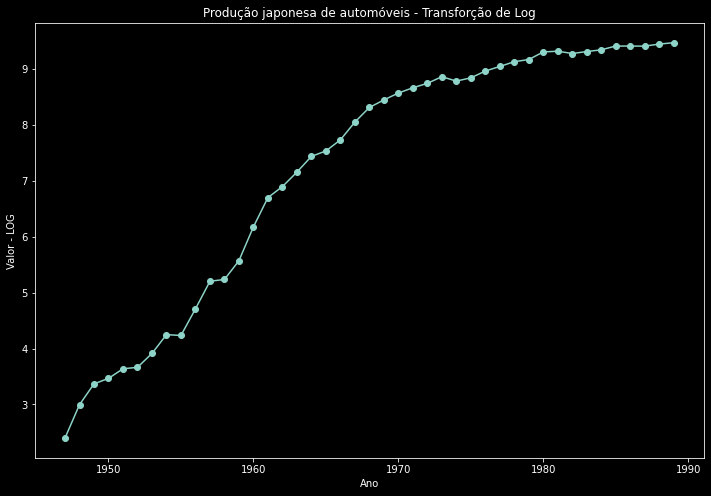

In [33]:
df_log = df
df_log.Valor = np.log(df_log.Valor)

plt.figure(figsize=(12, 8))
plt.plot(df_log.index, df_log.Valor, marker='o', linestyle='-')
plt.title('Produção japonesa de automóveis - Transforção de Log')
plt.xlabel('Ano')
plt.ylabel('Valor - LOG')
plt.show()

In [34]:
## array para adicionar as privisoes para a média movel simples
array_naive = []
## Andando pelo df_log durante os anos 1948 ate 1991
for i in range(1948, 1991):
    periodo_obs = df_log.loc[i-1, "Valor"]
    array_naive.append(periodo_obs)

for i, prev in zip(range(1948, 1991), array_naive):
    print(f"previsões para o ano {i+1}: {prev}")

previsões para o ano 1949: 2.3978952727983707
previsões para o ano 1950: 2.995732273553991
previsões para o ano 1951: 3.367295829986474
previsões para o ano 1952: 3.4657359027997265
previsões para o ano 1953: 3.6375861597263857
previsões para o ano 1954: 3.6635616461296463
previsões para o ano 1955: 3.912023005428146
previsões para o ano 1956: 4.248495242049359
previsões para o ano 1957: 4.23410650459726
previsões para o ano 1958: 4.709530201312334
previsões para o ano 1959: 5.204006687076795
previsões para o ano 1960: 5.236441962829949
previsões para o ano 1961: 5.572154032177765
previsões para o ano 1962: 6.1779441140506
previsões para o ano 1963: 6.70196036600254
previsões para o ano 1964: 6.898714534329988
previsões para o ano 1965: 7.157735484249907
previsões para o ano 1966: 7.43955930913332
previsões para o ano 1967: 7.53689712956617
previsões para o ano 1968: 7.734558844354756
previsões para o ano 1969: 8.053887083618223
previsões para o ano 1970: 8.315321775377567
previsões pa

In [35]:
print(len(array_naive))

43


In [36]:
## Calculando os erros 
array_naive.pop()
Err = df_log.loc[1948:1990, "Valor"].values - array_naive
print(Err)

[ 0.597837    0.37156356  0.09844007  0.17185026  0.02597549  0.24846136
  0.33647224 -0.01438874  0.4754237   0.49447649  0.03243528  0.33571207
  0.60579008  0.52401625  0.19675417  0.25902095  0.28182382  0.09733782
  0.19766171  0.31932824  0.26143469  0.13466267  0.12340003  0.09412348
  0.07984413  0.11810075 -0.0779272   0.05781957  0.12190399  0.08221796
  0.08496363  0.03883059  0.13629066  0.01232972 -0.04089654  0.03479567
  0.03127331  0.06793984 -0.00089682 -0.00089763  0.03615769  0.02534537]


In [37]:
square = Err**2
mse = np.mean(square)
print(f"o erro medio é {mse}")

o erro medio é 0.05885566984344235


In [38]:
mape = np.mean(np.abs(Err / df_log.loc[1948:1990, "Valor"].values)) * 100
print(f"Erro parcial absoluto medio {mape}")

Erro parcial absoluto medio 3.2051749502199676


In [39]:
## Transformando a previsao para a escala original
prev_1990 = np.exp(array_naive[-1])


In [40]:
df_pred = pd.read_excel("dados_questao_2_8.xlsx")
df_pred = df_pred.append({"Ano":1990, "Valor": prev_1990}, ignore_index=True)

C:\Users\RENANL~1\AppData\Local\Temp/ipykernel_14768/2476207913.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pred = df_pred.append({"Ano":1990, "Valor": prev_1990}, ignore_index=True)


In [41]:
df_pred.Ano = df_pred.Ano.astype(int)

In [42]:
df_pred.head()

,Ano,Valor
0,1947,11.0
1,1948,20.0
2,1949,29.0
3,1950,32.0
4,1951,38.0


In [43]:
df.head()

,Valor
Ano,
1947,2.397895
1948,2.995732
1949,3.367296
1950,3.465736
1951,3.637586


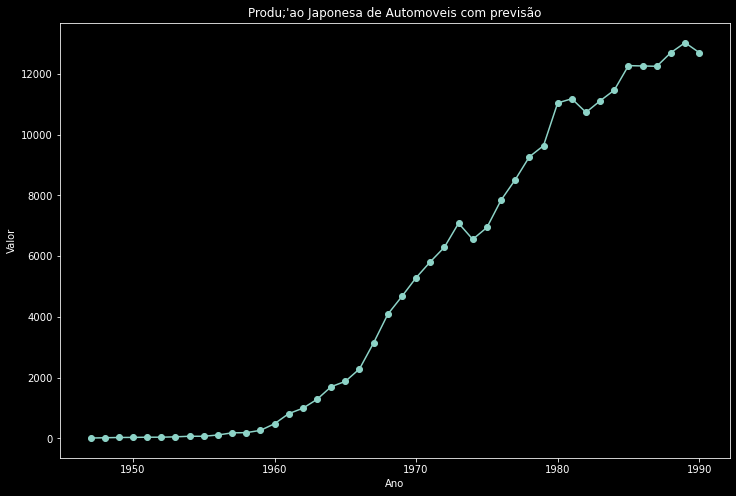

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(df_pred.Ano, df_pred.Valor, marker='o', linestyle="-")
plt.title("Produ;'ao Japonesa de Automoveis com previsão")
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

----

In [45]:
df = pd.read_excel("dados_questao_2_6.xlsx", index_col=0)
df.head()

,Actual Demand,Method 1 Forecast,Method 2 Forecast
Period,,,
1,139,157,170
2,137,145,162
3,174,140,157
4,142,162,173
5,141,149,164


In [46]:
df.iloc[:, 0]

Period
1     139
2     137
3     174
4     142
5     141
6     162
7     180
8     164
9     171
10    206
11    193
12    207
13    218
14    229
15    225
16    204
17    227
18    223
19    242
20    239
Name: Actual Demand, dtype: int64

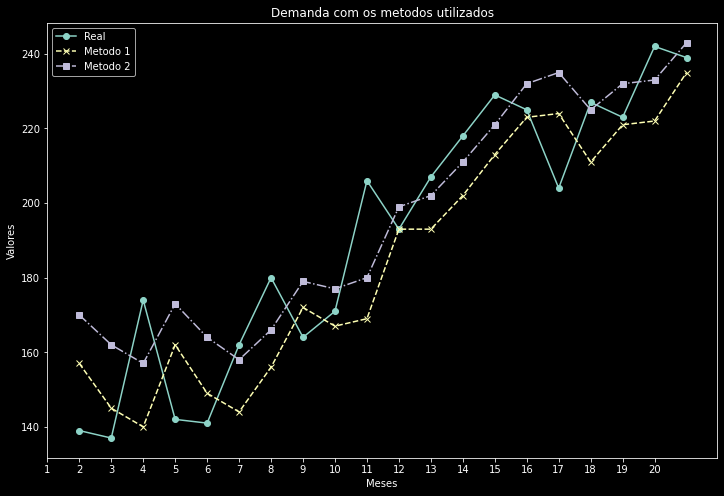

In [47]:
real = df.iloc[:, 0]
method_1 = df.iloc[:, 1]
method_2 = df.iloc[:, 2]

plt.figure(figsize=(12, 8))
plt.plot(real, label="Real", marker="o")
plt.plot(method_1, label="Metodo 1", marker="x", linestyle="--")
plt.plot(method_2, label="Metodo 2", marker="s", linestyle="-.")
plt.title("Demanda com os metodos utilizados")
plt.xlabel("Meses")
plt.ylabel("Valores")
plt.xticks(range(len(df)), df.index)
plt.legend()
plt.show()

In [48]:
## Calculando o erros do metodo 1
erro_1 = real - method_1
erro_abs_1 = np.abs(erro_1)
erro_square_1 = erro_1**2
erro_percent_1 = (erro_1 / real) * 100
erro_percent_1_abs = np.abs(erro_percent_1)
## Calculando as medias
erro_mean_1 = np.mean(erro_1)
erro_abs_mean_1 = np.mean(erro_abs_1)
erro_square_1_mean = np.mean(erro_square_1)
erro_percent_1_mean = np.mean(erro_percent_1)
erro_percent_1_abs_mean = np.mean(erro_percent_1_abs)


## Calculando o erro do metodo 2
erro_2 = real - method_2
erro_abs_2 = np.abs(erro_2)
erro_square_2 = erro_2**2
erro_percent_2 = (erro_2 / real) * 100
erro_percent_2_abs = np.abs(erro_percent_2)
erro_mean_2 = np.mean(erro_2)
## Calculando as medias
erro_mean_2 = np.mean(erro_2)
erro_abs_mean_2 = np.mean(erro_abs_2)
erro_square_2_mean = np.mean(erro_square_2)
erro_percent_2_mean = np.mean(erro_percent_2)
erro_percent_2_abs_mean = np.mean(erro_percent_2_abs)


print("-----Metricas de erro para o metodo 1 -----")
print(f"Erro medio {erro_mean_1}")
print(f"Erro absoluto medio {erro_abs_mean_1}")
print(f"Erro Quadratico medio {erro_square_1_mean}")
print(f"Erro percentual medio {erro_percent_1_mean}")
print(f"Erro percentual absoluto medio {erro_percent_1_abs_mean}")
print()
print("-----Metricas de erro para o metodo 2 -----")
print(f"Erro medio {erro_mean_2}")
print(f"Erro absoluto medio {erro_abs_mean_2}")
print(f"Erro Quadratico medio {erro_square_2_mean}")
print(f"Erro percentual medio {erro_percent_2_mean}")
print(f"Erro percentual absoluto medio {erro_percent_2_abs_mean}")

-----Metricas de erro para o metodo 1 -----
Erro medio 6.25
Erro absoluto medio 14.45
Erro Quadratico medio 307.25
Erro percentual medio 2.54588365965346
Erro percentual absoluto medio 7.868812919931557

-----Metricas de erro para o metodo 2 -----
Erro medio -4.8
Erro absoluto medio 14.0
Erro Quadratico medio 294.0
Erro percentual medio -3.605781538460878
Erro percentual absoluto medio 8.241618655704006
